## Exploratory Analysis of Census Income Data
* Objective: Predict whether income exceeds $50K/yr based on census data, also known as Adult dataset
* Analyze dataset and figure out the best machine learning models that can apply nicely without too overfitting or underfitting

### Source of information: 
* https://archive.ics.uci.edu/dataset/20/census+income



## Step 1 - Install and import the required libraries

In [1]:
# Import required dependencies
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV 

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import warnings
from sklearn.metrics import balanced_accuracy_score
warnings.filterwarnings("ignore")

import seaborn as sns

-------------------------

## Step 2 - Data Preparation
* Upload all the source files into /resources folder and add column headers: 
  * adult.data - which is used as the train data
  * adult.test - which is used as the test data
  * the 2 datasets are combined into one called census_combined_df going forward
* Check the tables to understand data types, missing values, and fix them for better data quality

In [2]:
# Import the data
census_df = pd.read_csv('./resources/adult.data')
census_test_df = pd.read_csv('./resources/adult.test', skiprows=1) # skip the first row as it might contain headers


In [3]:
# Display the first 10 rows of the data
display(census_df.head(10))
display(census_test_df.head(10))

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [4]:
# Add labels to the columns of the census_df
census_df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
# Add labels to the columns of the census_test_df
census_test_df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

census_test_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
5,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
7,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
8,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.
9,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.


In [6]:
# Combine the census_df and census_test_df
census_combined_df = pd.concat([census_df, census_test_df])

In [7]:
# Check how many rows of census_df
census_combined_df.shape

(48840, 15)

In [8]:
# Describe census_df
census_combined_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48840.000000,4.884000e+04,48840.000000,48840.000000,48840.000000,48840.000000
mean,38.643857,1.896657e+05,10.078092,1079.067301,87.505897,40.422400
std,13.710652,1.056048e+05,2.570954,7452.168393,403.012415,12.391697
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175535e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376472e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Check for missing values
census_combined_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
# Check unique values in the each column
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' 

In [11]:
# The workclass, occupation, and native-country columns have a value '?' which means it is a missing value. 
# Note some of these ? have extra spaces around them
# We will replace it with a NaN value
census_combined_df['workclass'] = census_combined_df['workclass'].replace(r'^\s*\?\s*$', np.nan, regex=True)
census_combined_df['occupation'] = census_combined_df['occupation'].replace(r'^\s*\?\s*$', np.nan, regex=True)
census_combined_df['native-country'] = census_combined_df['native-country'].replace(r'^\s*\?\s*$', np.nan, regex=True)

# From all records, remove any extra spaces around any values
census_combined_df = census_combined_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# From all records, remove dot character around any values
census_combined_df = census_combined_df.apply(lambda x: x.str.replace('.', '') if x.dtype == "object" else x)

In [12]:
# Drop all records that contain missing values (NaN)
census_combined_df.dropna(inplace=True)

In [13]:
# Check how many rows of census_df
census_combined_df.shape

(45220, 15)

In [14]:
# Remove duplicates
census_combined_df = census_combined_df.drop_duplicates()

In [15]:
# Check how many rows of census_df
census_combined_df.shape

(45173, 15)

In [16]:
# Check unique values in the each column
# Make sure there are no "?", ".", or extra spaces in the values
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

workclass
['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

fnlwgt
[ 83311 215646 234721 ... 173449  89686 350977]

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

education-num
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

marital-status
['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-F

##### For the Combined datasets, we removed 7.5% data with null values (approx 3604) that originally had ? sign and dropped 47 duplicate values. 
##### We now work with 45,173 rows from originally 48,840 rows

In [17]:
# Describe census_df
# Decimal digits are limited to only 3 decimals

census_combined_df.describe().round(3)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45173.000,45173.000,45173.000,45173.000,45173.000,45173.000
mean,38.556,189740.462,10.119,1102.577,88.692,40.943
std,13.215,105653.312,2.552,7510.413,405.165,12.008
min,17.000,13492.000,1.000,0.000,0.000,1.000
25%,28.000,117393.000,9.000,0.000,0.000,40.000
50%,37.000,178312.000,10.000,0.000,0.000,40.000
75%,47.000,237903.000,13.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


-------------------------

## Step 3 - Create a basic visualization for the combined data to understand any possible biases or imbalanced data

<Figure size 640x480 with 0 Axes>

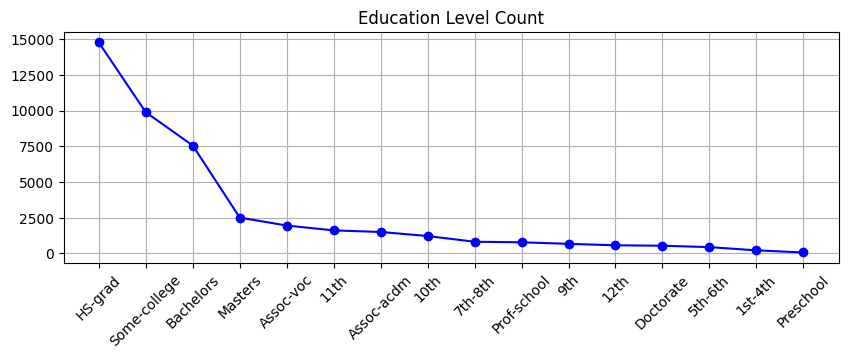

In [18]:
# Create a visualization of the education column

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['education'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Education Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

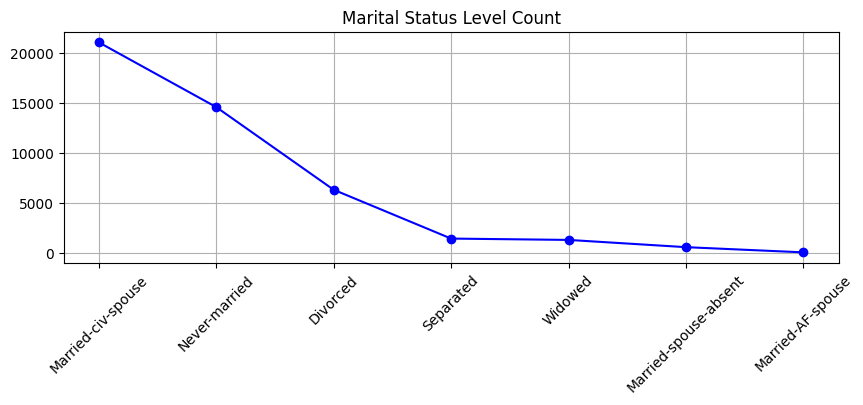

In [19]:
# Create a visualization of the marital status column

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['marital-status'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Marital Status Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

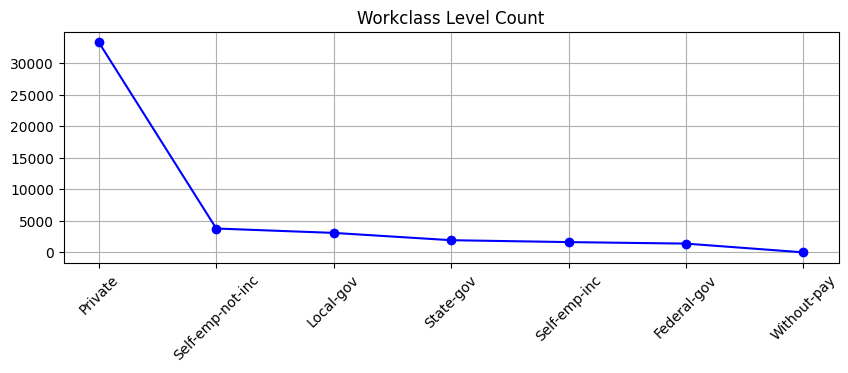

In [20]:
# Create a visualization of the workclass column 
plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['workclass'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Workclass Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

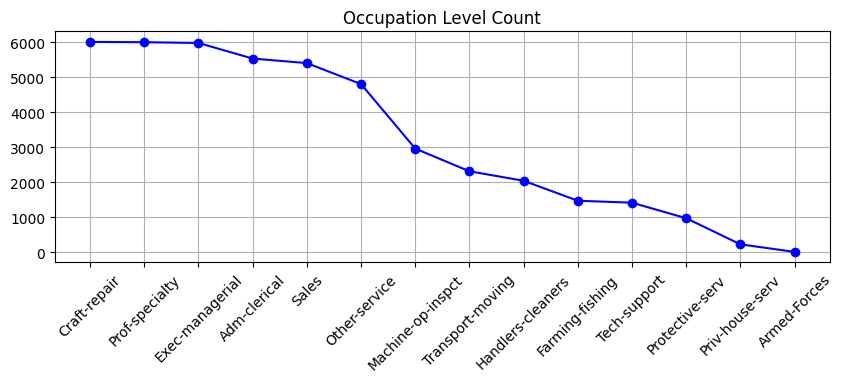

In [21]:
# Create a visualization of the occupation column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['occupation'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Occupation Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

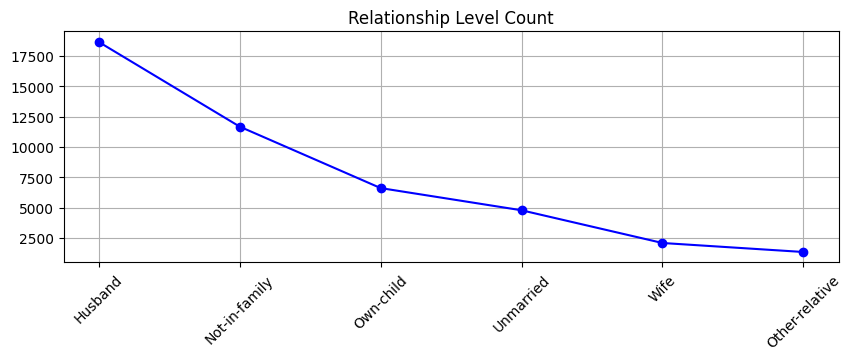

In [22]:
# Create a visualization of the relationship column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['relationship'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Relationship Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

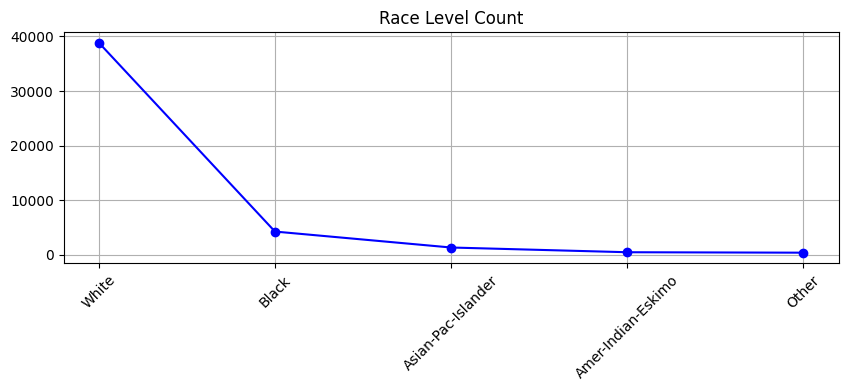

In [23]:
# Create a visualization of the race column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['race'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Race Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

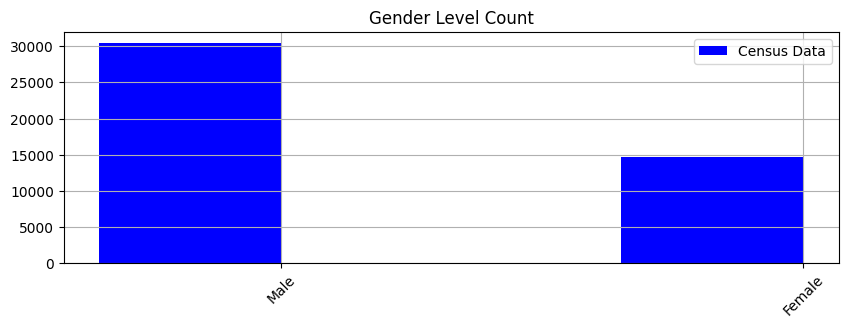

In [24]:
# Create a visualization of the sex column 
plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['sex'].value_counts()
width = 0.35

index = np.arange(len(train_work_counts.index))

plt.bar(index - width/2, train_work_counts.values, width, label='Census Data', color='blue')

plt.xticks(index, train_work_counts.index, rotation=45)
plt.title('Gender Level Count')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

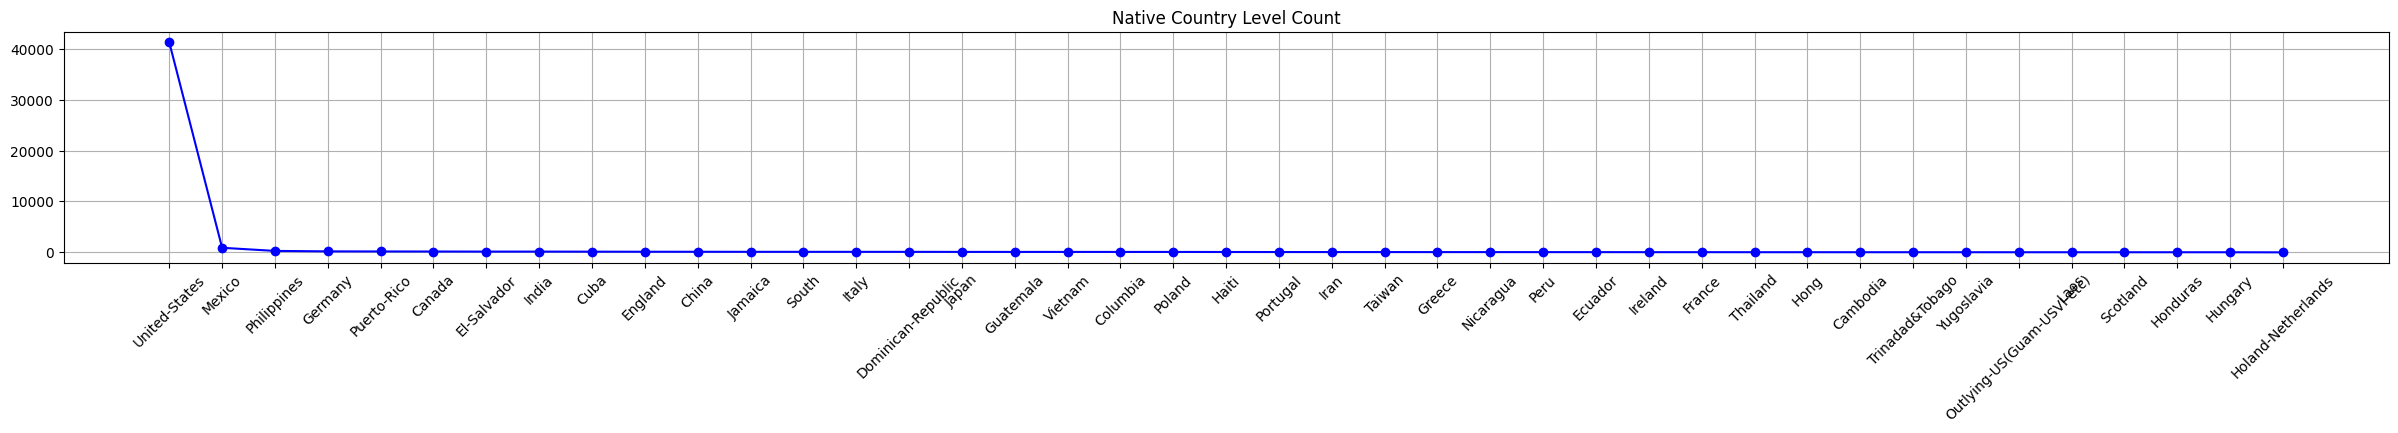

In [25]:
# Create a visualization of the native country column 
plt.clf()
plt.figure(figsize=(30, 3))
train_work_counts = census_combined_df['native-country'].value_counts()

plt.plot(train_work_counts.index, train_work_counts.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Native Country Level Count')
plt.grid(True)
plt.show()

<Figure size 640x480 with 0 Axes>

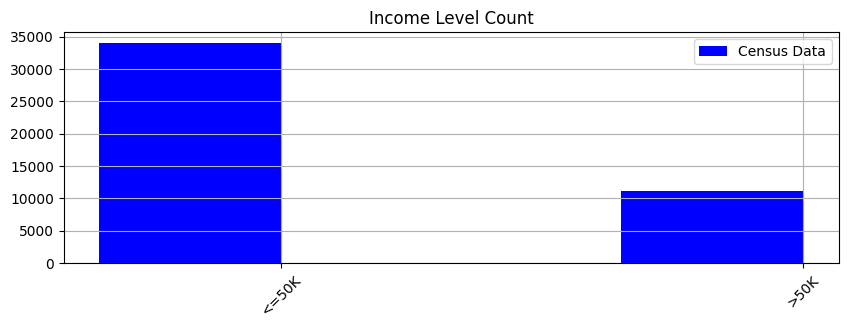

In [26]:
# Create a visualization of the income column 

plt.clf()
plt.figure(figsize=(10, 3))
train_work_counts = census_combined_df['income'].value_counts()
width = 0.35

index = np.arange(len(train_work_counts.index))

plt.bar(index - width/2, train_work_counts.values, width, label='Census Data', color='blue')

plt.xticks(index, train_work_counts.index, rotation=45)
plt.title('Income Level Count')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Let's drop all records with country not equal to United-States because the majority of the records are from the United States
# Non US Countries are not well represented in the dataset
# Total NON US records being removed were 3919
census_combined_df = census_combined_df[census_combined_df['native-country'] == 'United-States']


In [28]:
# Check how many rows of census_combined_df
census_combined_df.shape

(41254, 15)

#### Now we work with 41,254 records out of 48,840 original data

-------------------------

## Step 4 - Encoding, Binary Classification, Dimensionality Reduction
### Transform datasets from object for the following columns into Binary / Numeric values:
   * hours-per-week 
   * age
   * sex
   * marital-status
   * income
   * education 
   * occupation
   * workclass
   * race

### Delete these columns because they are not necessary / extra noise:
   * relationship
   * education-num
   * fnlwgt
   * native-country
   
   
   
   
   
   

In [29]:
# Check data type from census_combined_df
census_combined_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [30]:
# Made a copy of the census_combined_df before we do all of our processing 
census_combined_unprocessed_df = census_combined_df.copy() 
census_combined_unprocessed_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [31]:
# Categorize the hours per week column to 3 categories
# 1. Less than 30 hours - Part Time = 0
# 2. 30 to 40 hours - Full Time = 1
# 3. More than 40 hours - Over Time = 2
census_combined_df['hours-per-week'] = pd.cut(census_combined_df['hours-per-week'], bins=[0, 30, 40, 100], labels=[0, 1, 2])
census_combined_df['hours-per-week'] = census_combined_df['hours-per-week'].astype('int64')

census_combined_df['hours-per-week'].value_counts().sort_index()

hours-per-week
0     6020
1    22379
2    12855
Name: count, dtype: int64

In [32]:
# Categorize the age column to 3 categories
# 1. Less than 30 years - Young = 0
# 2. 30 to 50 years - Middle Age = 1
# 3. More than 50 years - Old = 2
census_combined_df['age'] = pd.cut(census_combined_df['age'], bins=[0, 30, 50, 100], labels=[0, 1, 2])
census_combined_df['age'] = census_combined_df['age'].astype('int64')


census_combined_df['age'].value_counts().sort_index()

age
0    12938
1    20325
2     7991
Name: count, dtype: int64

In [33]:
# Replace the sex column: male = 0 and female = 1
census_combined_df['sex'] = census_combined_df['sex'].replace({'Male': 0, 'Female': 1})

census_combined_df['sex'].value_counts().sort_index()

sex
0    27797
1    13457
Name: count, dtype: int64

In [34]:
# Replace the marital-status column to binaries
census_combined_df['marital-status'] = census_combined_df['marital-status'].replace({
    'Divorced': 0,
    'Never-married': 0,
    'Widowed': 0,
    'Married-civ-spouse': 1,
    'Married-AF-spouse': 1,
    'Married-spouse-absent': 1,
    'Separated': 1
})

census_combined_df['marital-status'].value_counts().sort_index()

marital-status
0    20459
1    20795
Name: count, dtype: int64

In [35]:
# Replace the income column: <=50K = 0 and >50K = 1
census_combined_df['income'] = census_combined_df['income'].replace({'<=50K': 0, '>50K': 1})

census_combined_df['income'].value_counts().sort_index()

income
0    30812
1    10442
Name: count, dtype: int64

In [36]:
"""
Categorize the education column to 4 categories
0. Early Education (Preschool & Primary)
	•	Preschool (Ages 3-5) – Nursery, Pre-Kindergarten
	•	Primary School (Ages 5-11) – Kindergarten to Grade 5
1. Secondary Education (Middle & High School)
	•	Middle School (Ages 11-14) – Grades 6-8
	•	High School (Ages 14-18) – Grades 9-12
2. Higher Education (Undergraduate Studies)
	•	Associate’s Degree (Optional, ~2 years)
	•	Bachelor’s Degree (Typically 4 years)
3. Advanced Education (Graduate & Doctoral Studies)
	•	Master’s Degree (1-3 years)
	•	Doctorate (Ph.D., M.D., J.D., etc., 3+ years)"
"""
census_combined_df['education'] = census_combined_df['education'].replace({
    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 0,
    '7th-8th': 1,
    '9th': 1,
    '10th': 1,
    '11th': 1,
    '12th': 1,
    'HS-grad': 1,
    'Some-college': 2,
    'Assoc-acdm': 2,
    'Assoc-voc': 2,
    'Bachelors': 2,
    'Masters': 3,
    'Doctorate': 3,
    'Prof-school': 3
})

census_combined_df['education'].value_counts().sort_index()

education
0      205
1    18089
2    19506
3     3454
Name: count, dtype: int64

In [37]:
# Format the Occupation column to binary where 0 = Blue Collar and 1 = White Collar
census_combined_df['occupation'] = census_combined_df['occupation'].replace({
   'Farming-fishing': 0,
   'Protective-serv': 0,
   'Machine-op-inspct': 0,
   'Other-service': 0,
   'Craft-repair': 0,
   'Transport-moving': 0,
   'Handlers-cleaners': 0,
   'Armed-Forces': 0,
   'Priv-house-serv': 0,
   'Prof-specialty': 1,
   'Adm-clerical': 1,
   'Exec-managerial': 1,
   'Tech-support': 1,
   'Sales': 1,
})

census_combined_df['occupation'].value_counts().sort_index()

occupation
0    18616
1    22638
Name: count, dtype: int64

In [38]:
# Clean workclass column
# Replace the workclass column to binaries
# 0 = Private
# 1 = Self-employed and Without-pay
# 2 = Government
census_combined_df['workclass'] = census_combined_df['workclass'].replace({
    'Private': 0,
    'Self-emp-not-inc': 1,
    'Self-emp-inc': 1,
    'Without-pay': 1,
    'State-gov': 2,
    'Federal-gov': 2,
    'Local-gov': 2
})
census_combined_df['workclass'].value_counts().sort_index()

workclass
0    30110
1     5044
2     6100
Name: count, dtype: int64

In [39]:
# Categorize the Race column to 5 categories
# 0 = White
# 1 = Black
# 2 = Asian-Pac-Islander
# 3 = Amer-Indian-Eskimo
# 4 = Other
census_combined_df['race'] = census_combined_df['race'].replace({
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4
})
census_combined_df['race'].value_counts().sort_index()    

race
0    36312
1     3960
2      397
3      417
4      168
Name: count, dtype: int64

In [40]:
# Drop relationship column, extra noise we don't need
# Instead, we will use the marital-status column
census_combined_df.drop(columns=['relationship'], inplace=True)

In [41]:
# Drop the education num column - this is extra noise we don't need
# instead, we will use the education column
census_combined_df.drop(columns=['education-num'], inplace=True)

In [42]:
# Drop native-country column, since everything already changed to USA
census_combined_df.drop(columns=['native-country'], inplace=True)

In [43]:
# Drop fnlwgt column, since it has no use
census_combined_df.drop(columns=['fnlwgt'], inplace=True)

### Create new column 'assets'
Capital gain and loss doesn't give us very much information unless we understand an individual is in the positive or negative so we'll create a new column assets that better describes a persons gain or loss (postive number of how much they gained and negative number of how much they lost.)

In [44]:
# Create new column assets by capital-gain - capital-loss
census_combined_df['assets'] = census_combined_df['capital-gain'] - census_combined_df['capital-loss']

# Drop capital-gain and capital-loss columns
census_combined_df = census_combined_df.drop(['capital-gain', 'capital-loss'], axis=1)


In [45]:
## Check how the data looks like now
census_combined_df.head(25)

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,income,assets
0,1,1,2,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0
2,2,0,1,1,0,1,0,1,0,0
4,1,0,3,1,1,0,1,1,0,0
6,2,1,1,1,1,0,0,2,1,0
7,1,0,3,0,1,0,1,2,1,14084
8,1,0,2,1,1,0,0,1,1,5178
9,1,0,2,1,1,1,0,2,1,0
11,0,0,2,0,1,0,1,0,0,0
12,1,0,2,0,1,1,0,2,0,0


In [46]:
# Check unique values in the each column
for column in census_combined_df.columns:
    print(column)
    print(census_combined_df[column].unique())
    print()

age
[1 2 0]

workclass
[1 0 2]

education
[2 1 3 0]

marital-status
[1 0]

occupation
[1 0]

race
[0 1 4 2 3]

sex
[0 1]

hours-per-week
[0 1 2]

income
[0 1]

assets
[    0 14084  5178 -2042 -1408  5013  2407 14344 -1902 15024  7688  4064
 -1719 -1762  4386 -1564 -2179 -1816 -1980 -1977  7298 -1876 -1340 -2206
  1409  3674 -1741  1055 -1485 -1887  2050 -2339 -2415  2176  2174   594
 -1380 20051  6849  4101  8614  3411 -1721  2597 25236 -2051  4650 -2377
 -1669 -2352  2463  3103 -1672  -653 10605 -2392  2964  3325 -1504  2580
  3471 -1590  4865 99999  6514 -1628  1471  2329 -1848  2105 -2001  2885
 10520 -1740  2202 -2002  2961 27828  6767  2228 -1579  1506  2635 -2258
  5556 -1602  4787  3137 -2547  3818   914   401  2829  2977  4934 -2205
 -1726 -2444  2062 -1138 -2238  2354  3464  5455  1424  -625  3273 22040
  -213  4416 10566  4931 -1539  -880  7430 34095  6497  3908   114 -1668
  2346 -1594 -2231 -1844 13550  -810 -2824  2907  1151 -2559  9386  2414
  3418 15831 -1573 -1974  2538

In [47]:
# Check the data type of each column
census_combined_df.dtypes

age               int64
workclass         int64
education         int64
marital-status    int64
occupation        int64
race              int64
sex               int64
hours-per-week    int64
income            int64
assets            int64
dtype: object

-------

## Step 5 - Variance Inflation Factor (VIF) test to assess multicolinearity
 

In [48]:
# Drop target column
# We will use this column to create our y_train and y_test
X_vif = census_combined_df.drop(columns=["income"])

In [49]:
# One-hot encode any categorical features
X_vif = pd.get_dummies(X_vif, drop_first=True)

In [50]:
# Add constant to the features for VIF calculation
from statsmodels.tools.tools import add_constant
X_vif_const = add_constant(X_vif)

In [51]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i + 1) for i in range(X_vif.shape[1])]

In [52]:
# Print VIF results
print(vif_data.sort_values(by="VIF", ascending=False))

          feature       VIF
3  marital-status  1.337080
6             sex  1.314780
4      occupation  1.304685
2       education  1.271688
0             age  1.143666
7  hours-per-week  1.126601
1       workclass  1.060613
8          assets  1.024331
5            race  1.017819


### So based on the results above, the VIF is between 1-5 which means generally considered acceptable, indicating moderate correlation that usually is NOT problematic.A high multicollinearity is if the VIF is above 5. We are nothing near that number.

-------

## Step 6 - Train Test Split For Other Supervised Machine Learning Model

In [53]:
# Define X and Y
X = census_combined_df.drop('income', axis=1)
y = census_combined_df['income']

# Split the data into training and testing sets (25% of the data for testing)
X_train_prescaled, X_test_prescaled, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Verify the shapes of the training and testing sets
print(X_train_prescaled.shape)
print(X_test_prescaled.shape)

(30940, 9)
(10314, 9)


## Post-Split Scaling and Encoding

Here we'll apply a standard scaler to the 'assets' columns to prevent data leakage. 

In [54]:
# Define scarler object
scaler = StandardScaler()

# Create the scaled train and test data
X_train = X_train_prescaled.copy()
X_test = X_test_prescaled.copy()

# Fit the StandardScaler to X_train on the 'fnlwgt' column
X_train[['assets']] = scaler.fit_transform(X_train[['assets']])

# Apply the scaler to the test set
X_test[['assets']] = scaler.transform(X_test[['assets']])  

# Preview the scaled data
display(print(X_train.head(10)))
display(print(X_test.head(10)))

       age  workclass  education  marital-status  occupation  race  sex  \
12643    0          2          2               0           1     0    1   
10793    0          0          1               1           0     0    1   
9544     1          0          1               1           0     0    1   
10345    0          0          1               0           1     0    0   
11025    0          0          1               0           1     0    0   
3027     0          0          2               0           0     0    0   
14759    2          1          1               1           0     0    0   
7277     1          0          2               0           0     0    1   
8933     0          0          2               0           0     1    0   
1707     1          2          2               1           0     0    0   

       hours-per-week    assets  
12643               0 -0.135603  
10793               1 -0.135603  
9544                1 -0.135603  
10345               0 -0.135603  
1102

None

       age  workclass  education  marital-status  occupation  race  sex  \
9695     0          0          2               0           1     0    1   
27605    0          0          1               1           0     1    0   
17124    0          0          2               0           1     0    0   
3187     0          0          1               0           0     0    0   
8134     0          0          2               0           1     0    0   
2595     1          0          1               1           0     0    0   
6783     0          0          1               0           0     0    0   
5732     1          1          1               1           1     0    0   
29228    0          1          2               0           1     0    1   
1539     1          2          2               0           1     1    1   

       hours-per-week    assets  
9695                1 -0.135603  
27605               1 -0.135603  
17124               1  0.300209  
3187                0 -0.135603  
8134

None

### Let's run a loop that prints the accuracy score for all kinds of different models

In [55]:
## Do everything in a loop

def train_and_evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: Train Accuracy = {train_score:.4f}, Test Accuracy = {test_score:.4f}, Accuracy = {accuracy:.4f}")

# Define a list of models to evaluate.
models = [
    GradientBoostingClassifier(random_state=1),
    ExtraTreesClassifier(random_state=1),
    RandomForestClassifier(random_state=1),
    DecisionTreeClassifier(random_state=1),
    KNeighborsClassifier(n_neighbors=3),
    AdaBoostClassifier(random_state=1),    
    LogisticRegression(random_state=1),
]

# Loop over each model, train and evaluate.
for model in models:
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

GradientBoostingClassifier: Train Accuracy = 0.8530, Test Accuracy = 0.8514, Accuracy = 0.8514
ExtraTreesClassifier: Train Accuracy = 0.8671, Test Accuracy = 0.8415, Accuracy = 0.8415
RandomForestClassifier: Train Accuracy = 0.8671, Test Accuracy = 0.8454, Accuracy = 0.8454
DecisionTreeClassifier: Train Accuracy = 0.8671, Test Accuracy = 0.8458, Accuracy = 0.8458
KNeighborsClassifier: Train Accuracy = 0.8086, Test Accuracy = 0.7895, Accuracy = 0.7895
AdaBoostClassifier: Train Accuracy = 0.8388, Test Accuracy = 0.8377, Accuracy = 0.8377
LogisticRegression: Train Accuracy = 0.8284, Test Accuracy = 0.8304, Accuracy = 0.8304


### Looks like the best model is GradientBoostingClassifier (perfect 85% score all across)

-----

## Step 7 - Hyperparam tuning for KNeighbors

In [56]:
# Create the tuning models

untuned_model = KNeighborsClassifier()
grid_tuned_model = KNeighborsClassifier()
random_tuned_model = KNeighborsClassifier()

In [57]:
## Train a model without tuning
from sklearn.metrics import classification_report

# Define target names based on unique values in Income column
target_names = ['<=$50K/yr (0)', '>$50K/yr (1)']

untuned_model.fit(X_train, y_train)
untuned_y_pred = untuned_model.predict(X_test)
print(classification_report(y_test, untuned_y_pred,
                            target_names=target_names))

               precision    recall  f1-score   support

<=$50K/yr (0)       0.86      0.92      0.89      7720
 >$50K/yr (1)       0.68      0.55      0.61      2594

     accuracy                           0.82     10314
    macro avg       0.77      0.73      0.75     10314
 weighted avg       0.81      0.82      0.82     10314



In [58]:
print(balanced_accuracy_score(y_test, untuned_y_pred))

0.7318645359358584


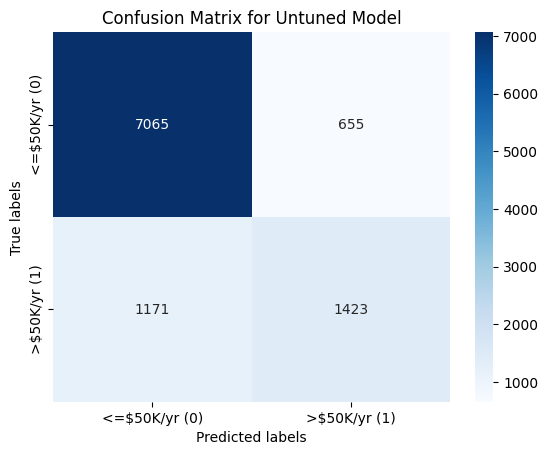

In [59]:
# Confusion matrix for KNeighbors
# make the confusion matrix
conf_matrix = confusion_matrix(y_test, untuned_y_pred, labels = [0,1])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Untuned Model')
plt.show()

In [60]:
# Calculate the balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, untuned_y_pred):.4f}")

Balanced Accuracy Score: 0.7319


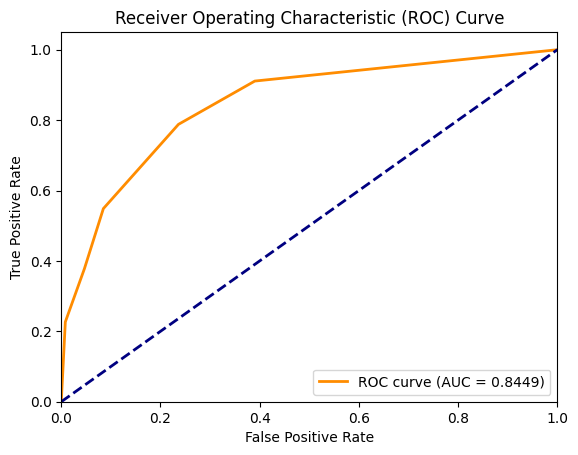

ROC AUC Score: 0.8449


In [61]:
# Calculate the ROC curve and ROC AUC score
y_pred_proba = untuned_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate ROC curve points
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'ROC AUC Score: {roc_auc:.4f}')

In [62]:
# Calculate the roc_auc_score

# Get probability estimates
untuned_y_pred_proba = untuned_model.predict_proba(X_test)

# Calculate ROC AUC score for each class
for i, class_label in enumerate(untuned_model.classes_):
    class_roc_auc = roc_auc_score(y_test == class_label, untuned_y_pred_proba[:, i])
    print(f"ROC AUC Score for class {class_label}: {class_roc_auc:.4f}")

# Calculate the average ROC AUC score
avg_roc_auc = roc_auc_score(y_test, untuned_y_pred_proba[:, 1])
print(f"\nAverage ROC AUC Score: {avg_roc_auc:.4f}")

ROC AUC Score for class 0: 0.8449
ROC AUC Score for class 1: 0.8449

Average ROC AUC Score: 0.8449


----

## Step 8 - Hyperparam tuning for GradientBoostingClassifier

In [63]:
# Create the tuning models

untuned_model = GradientBoostingClassifier(random_state=1)
grid_tuned_model = GradientBoostingClassifier(random_state=1)
random_tuned_model = GradientBoostingClassifier(random_state=1)

In [64]:
## Train a model without tuning
from sklearn.metrics import classification_report

# Define target names based on unique values in Result column
target_names = ['<=$50K/yr (0)', '>$50K/yr (1)']

untuned_model.fit(X_train, y_train)
untuned_y_pred = untuned_model.predict(X_test)
print(classification_report(y_test, untuned_y_pred,
                            target_names=target_names))

               precision    recall  f1-score   support

<=$50K/yr (0)       0.87      0.94      0.90      7720
 >$50K/yr (1)       0.77      0.58      0.66      2594

     accuracy                           0.85     10314
    macro avg       0.82      0.76      0.78     10314
 weighted avg       0.85      0.85      0.84     10314



Set up parameter grids for both GridSearchCV and RandomizedSearchCV

In [65]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Define parameter distribution for RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'subsample': uniform(0.7, 0.3)
}

Set up cross-validation for both methods

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Simplified parameter grid with fewer options
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
}

# Simplified parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.05, 0.1),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 6),
}

# GridSearchCV with fewer CV folds
grid_search = GridSearchCV(
    estimator=grid_tuned_model,
    param_grid=param_grid,
    cv=3,  # Reduced from 5 to 3
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# RandomizedSearchCV with fewer iterations and CV folds
random_search = RandomizedSearchCV(
    estimator=random_tuned_model,
    param_distributions=param_dist,
    n_iter=10,  # Reduced from 20 to 10
    cv=3,  # Reduced from 5 to 3
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=1
)



Fit both search methods to your training data

In [67]:
# Fit grid search
grid_search.fit(X_train, y_train)

# Fit random search
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x14cc7d4c0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14cc7c7a0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14cf217c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14cf32db0>},
                   random_state=1, scoring='f1_macro', verbose=1)

Get the best parameters and scores

In [68]:
# Best parameters from grid search
print("Best parameters found by grid search:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Best parameters from random search
print("\nBest parameters found by random search:")
print(random_search.best_params_)
print(f"Best cross-validation score: {random_search.best_score_:.3f}")

Best parameters found by grid search:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score: 0.798

Best parameters found by random search:
{'learning_rate': np.float64(0.13650202519789834), 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 241}
Best cross-validation score: 0.797


Evaluate the tuned models on the test set

In [69]:
# Evaluate grid-tuned model
grid_y_pred = grid_search.best_estimator_.predict(X_test)
print("\nGrid Search Tuned Model Performance:")
print(classification_report(y_test, grid_y_pred, target_names=target_names))

# Evaluate randomly-tuned model
random_y_pred = random_search.best_estimator_.predict(X_test)
print("\nRandom Search Tuned Model Performance:")
print(classification_report(y_test, random_y_pred, target_names=target_names))


Grid Search Tuned Model Performance:
               precision    recall  f1-score   support

<=$50K/yr (0)       0.88      0.93      0.91      7720
 >$50K/yr (1)       0.76      0.63      0.69      2594

     accuracy                           0.86     10314
    macro avg       0.82      0.78      0.80     10314
 weighted avg       0.85      0.86      0.85     10314


Random Search Tuned Model Performance:
               precision    recall  f1-score   support

<=$50K/yr (0)       0.88      0.93      0.91      7720
 >$50K/yr (1)       0.76      0.62      0.69      2594

     accuracy                           0.86     10314
    macro avg       0.82      0.78      0.80     10314
 weighted avg       0.85      0.86      0.85     10314



Feature importance analysis

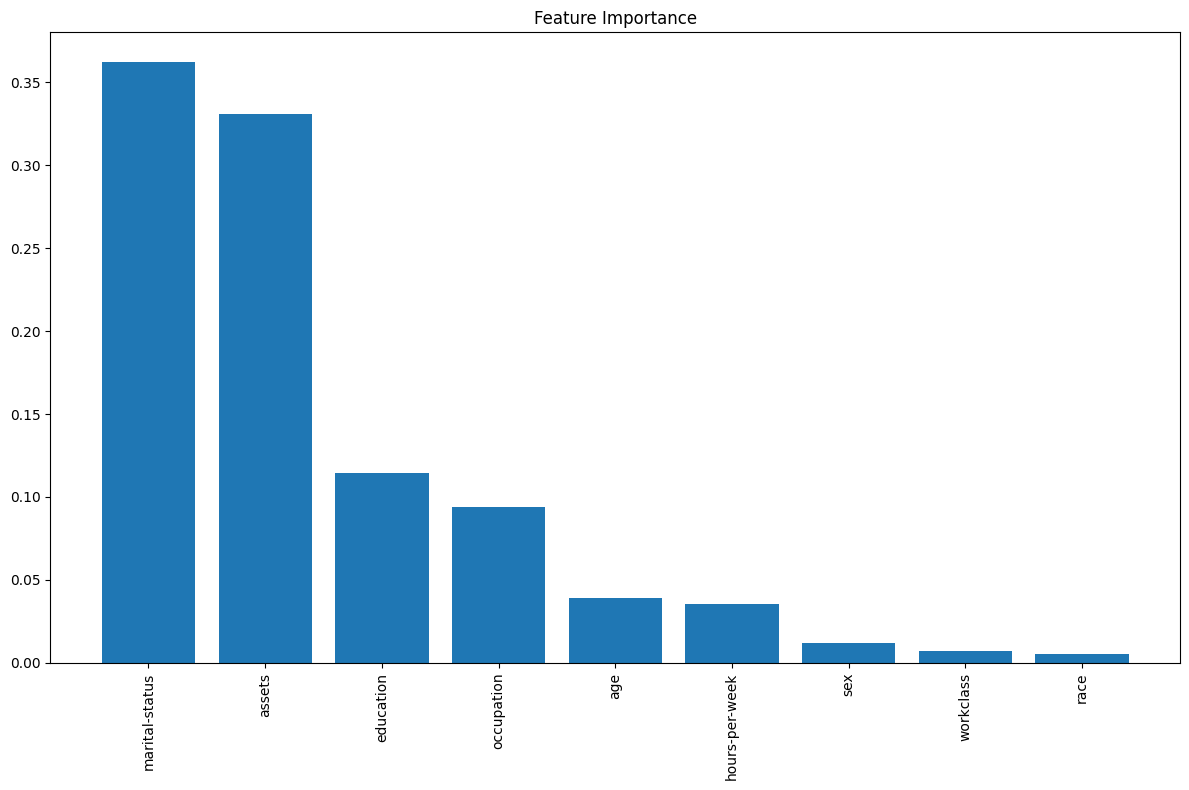

In [70]:
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importance')
    plt.bar(range(len(indices)), importances[indices], align='center')
    plt.xticks(range(len(indices)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Use with best model
best_model = grid_search.best_estimator_  # or random_search.best_estimator_
plot_feature_importance(best_model, X_train.columns)

Learning curves to check for overfitting

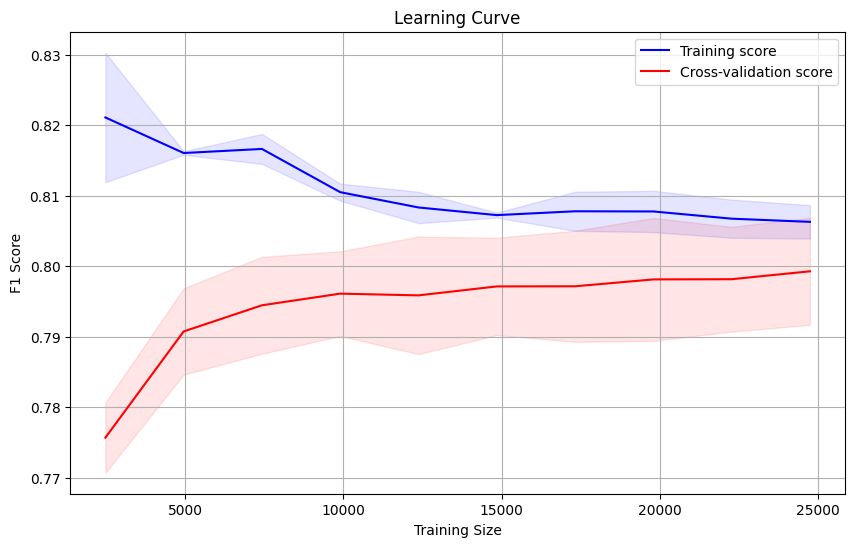

In [71]:
def plot_learning_curve(estimator, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1_macro')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(best_model, X_train, y_train)

Class Weights

In [72]:
# Get the best parameters from grid search
best_params = grid_search.best_params_

# Calculate sample weights to handle class imbalance
from sklearn.utils.class_weight import compute_sample_weight

# Create balanced weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Create and train the model with sample weights
balanced_model = GradientBoostingClassifier(**best_params, random_state=1)
balanced_model.fit(X_train, y_train, sample_weight=sample_weights)

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                           random_state=1)

SMOTE or other resampling techniques

In [73]:
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train your best model on resampled data
best_model = GradientBoostingClassifier(**grid_search.best_params_, random_state=1)
best_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=200,
                           random_state=1)

After running all the tuning approaches, you should check several indicators to determine which tuning method produced the best model:

F1-macro score: Since you're dealing with imbalanced classes, the macro-averaged F1 score is a good primary metric as it gives equal weight to all classes regardless of their frequency.
Per-class metrics: Pay special attention to the precision, recall, and F1-score of your underperforming class ('Legitimate (-1)'). A good tuning approach should improve these metrics without significantly degrading performance on other classes.
Confusion matrix: Examine the confusion matrix to see where misclassifications are occurring with each tuned model.
ROC-AUC and PR-AUC curves: For multi-class problems, look at the area under these curves, especially for the minority class.

In [74]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

# Dictionary to store models
models = {
    "Untuned": untuned_model,
    "GridSearch": grid_search.best_estimator_,
    "RandomSearch": random_search.best_estimator_,
    "Balanced": balanced_model,
    "SMOTE": best_model
}


--- Untuned Model Results ---
Macro F1: 0.7844
Legitimate class Recall: 0.9409
Legitimate class Precision: 0.8709


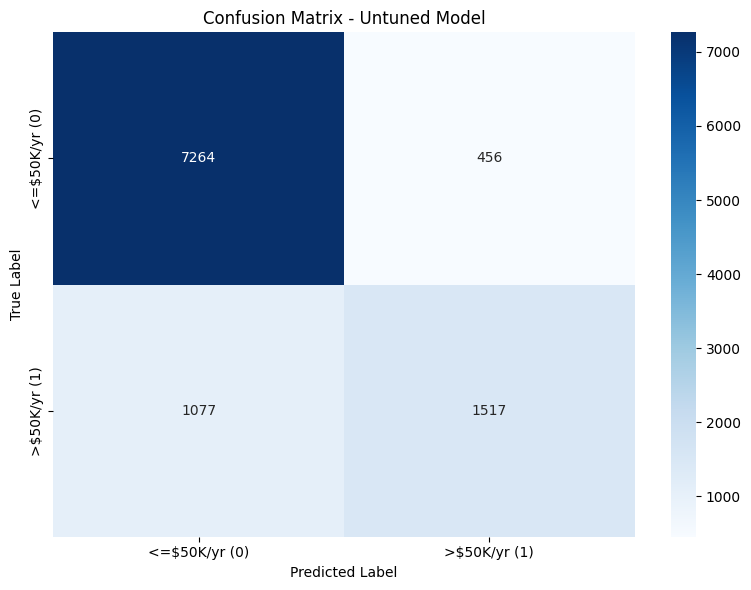


--- GridSearch Model Results ---
Macro F1: 0.7957
Legitimate class Recall: 0.9324
Legitimate class Precision: 0.8812


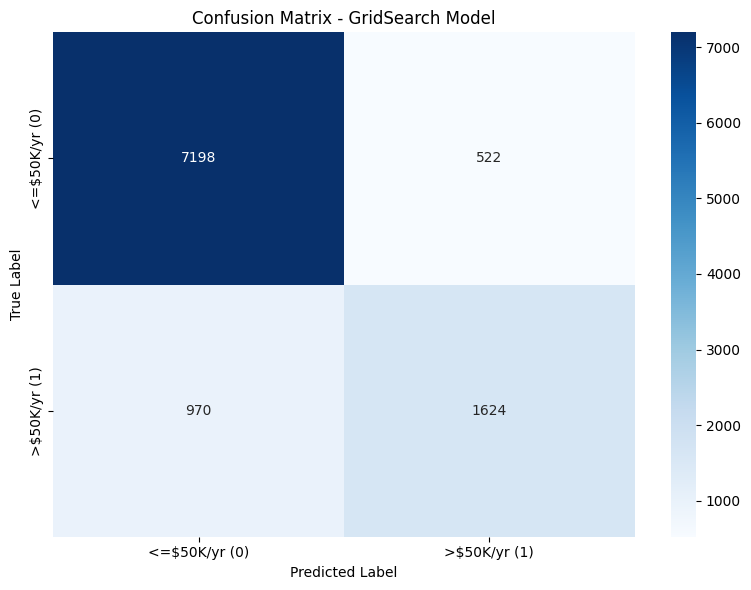


--- RandomSearch Model Results ---
Macro F1: 0.7965
Legitimate class Recall: 0.9350
Legitimate class Precision: 0.8807


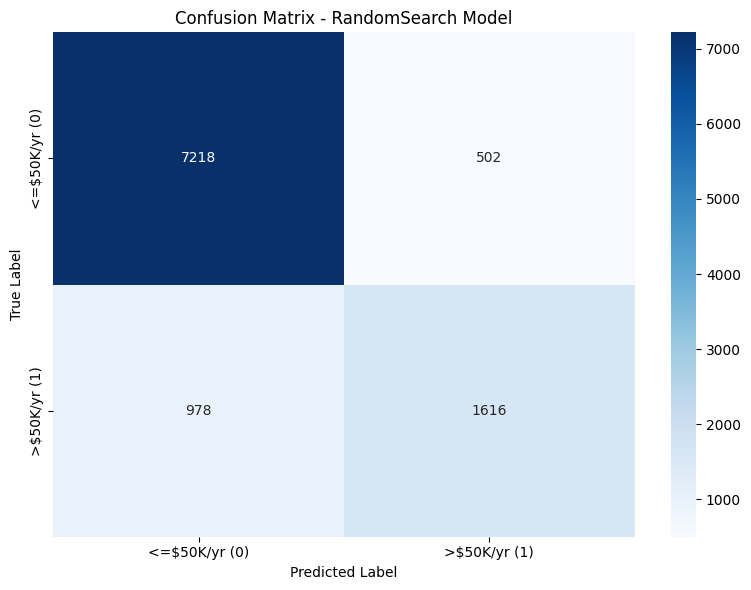


--- Balanced Model Results ---
Macro F1: 0.7796
Legitimate class Recall: 0.8040
Legitimate class Precision: 0.9375


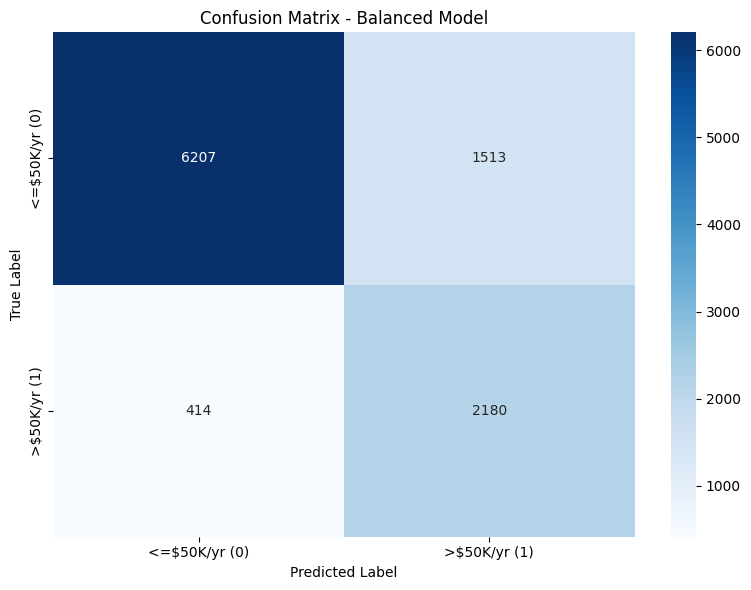


--- SMOTE Model Results ---
Macro F1: 0.7759
Legitimate class Recall: 0.7970
Legitimate class Precision: 0.9385


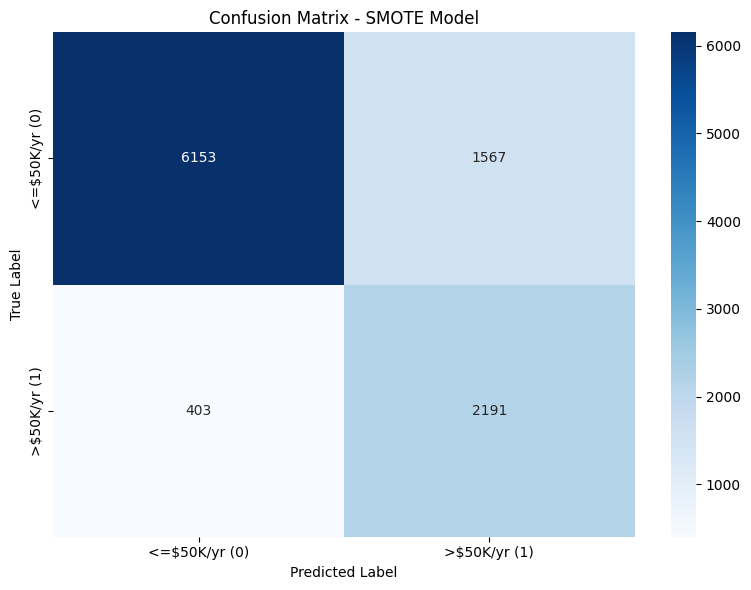


Best model based on macro F1 score: RandomSearch
Best model for 'Legitimate' class recall: Untuned


In [75]:
# Dictionary to store results
results = {}

# Loop through each model and evaluate
for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # Store results
    results[name] = {
        'f1_macro': report['macro avg']['f1-score'],
        'f1_per_class': {label: report[label]['f1-score'] for label in target_names},
        'recall_class0': report['<=$50K/yr (0)']['recall'],
        'precision_class0': report['<=$50K/yr (0)']['precision'],
        'confusion_matrix': cm,
        'probabilities': y_prob
    }

    # Print summary
    print(f"\n--- {name} Model Results ---")
    print(f"Macro F1: {results[name]['f1_macro']:.4f}")
    print(f"Legitimate class Recall: {results[name]['recall_class0']:.4f}")
    print(f"Legitimate class Precision: {results[name]['precision_class0']:.4f}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {name} Model')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Find best model based on macro F1 score
best_model_name = max(results, key=lambda x: results[x]['f1_macro'])
print(f"\nBest model based on macro F1 score: {best_model_name}")

# Find best model for the problematic 'Legitimate' class
best_legitimate_recall = max(results, key=lambda x: results[x]['recall_class0'])
print(f"Best model for 'Legitimate' class recall: {best_legitimate_recall}")

When comparing models, prioritize:

The model with the highest macro F1 score if you want balanced performance across all classes.
The model with the best metrics for your underperforming class ('Legitimate (-1)') if that's your priority.
The simplest model that achieves comparable performance to more complex ones (following the principle of parsimony).

Also consider the trade-offs between precision and recall for your specific application. If false negatives for the 'Legitimate' class are more costly than false positives, prioritize models with higher recall for that class.

----

## Step 9 - Confusion Matrix for GradientBoosting

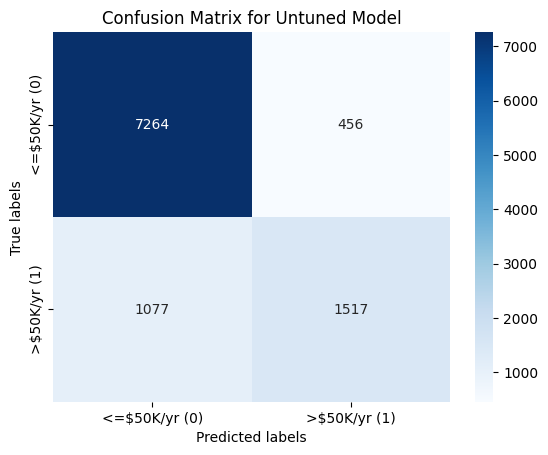

In [76]:
# make the confusion matrix
conf_matrix = confusion_matrix(y_test, untuned_y_pred, labels = [0,1])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Untuned Model')
plt.show()

In [77]:
# Calculate the balanced accuracy score
print(f"Balanced Accuracy Score: {balanced_accuracy_score(y_test, untuned_y_pred):.4f}")

Balanced Accuracy Score: 0.7629


In [78]:
# Calculate the roc_auc_score

# Get probability estimates
untuned_y_pred_proba = untuned_model.predict_proba(X_test)

# Calculate ROC AUC score for each class
for i, class_label in enumerate(untuned_model.classes_):
    class_roc_auc = roc_auc_score(y_test == class_label, untuned_y_pred_proba[:, i])
    print(f"ROC AUC Score for class {class_label}: {class_roc_auc:.4f}")

# Calculate the average ROC AUC score
avg_roc_auc = roc_auc_score(y_test, untuned_y_pred_proba[:, 1])
print(f"\nAverage ROC AUC Score: {avg_roc_auc:.4f}")


ROC AUC Score for class 0: 0.9040
ROC AUC Score for class 1: 0.9040

Average ROC AUC Score: 0.9040


------

## Step 10 - Logistic Regression Model

In [79]:
# Create the model and fit the scaled data into LogisticRegression()
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6253484880977911


In [80]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8306185766918751


#### Visualize the model

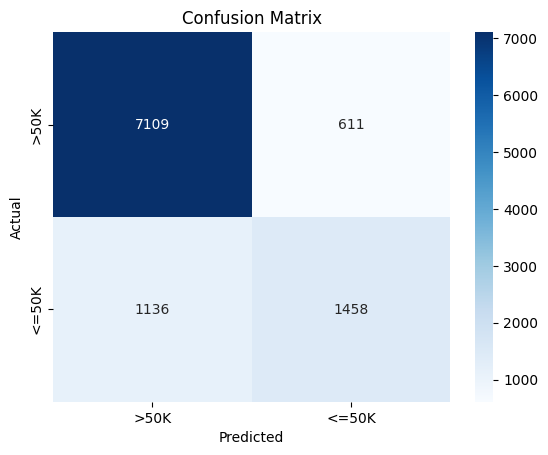

In [81]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

----

#### Inspecting Model Coefficients

In [82]:
# Create an array of feature names
feature_names = list(X_train.columns)

# Retrieve the coefficients from the model (assuming a binary classification logistic regression)
coefficients = model.coef_[0]

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'feature names': feature_names, 'coefficient': coefficients})
# Compute absolute value for sorting
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

# Sort by absolute coefficient value
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)
print(coef_df.head(10))

    feature names  coefficient  abs_coefficient
3  marital-status     2.205058         2.205058
8          assets     1.841746         1.841746
2       education     0.900522         0.900522
4      occupation     0.897346         0.897346
7  hours-per-week     0.647891         0.647891
0             age     0.521276         0.521276
6             sex    -0.516214         0.516214
5            race    -0.192608         0.192608
1       workclass    -0.004320         0.004320


Inspecting the model coefficients above, it looks like marital status has the most influence on whether an individual makes over 50K. Since we did a binary numeric categorization of marital status where 0 = single and 1 = Married, married couples make money together.

Next feature that had influence is occupation and then education.

Capital loss is the weakest of the feature columns to have any affect on income level.

------

## Step 11 - Try another model to improve F1 score


### Random Forest Model 
##### Code based off lesson 13-2-5 and 13-2-6

In [83]:
census_combined_df.shape

(41254, 10)

In [84]:
### Calculate the accuracy of the model on the testing data
X = census_combined_df.drop('income', axis=1)
y = census_combined_df['income']

#### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=1).fit(X_train, y_train)

# Calculate the Accuracy of the model on the testing data
test_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {test_accuracy}")

# Calculate the balanced accuracy of the model on the training data
train_accuracy = rf_model.score(X_train, y_train)
print(f"Random Forest Train Accuracy: {train_accuracy}")

### Random Forest Test Accuracy: 0.8488462284273802
### Random Forest Train Accuracy: 0.8660956690368455

Random Forest Test Accuracy: 0.8488462284273802
Random Forest Train Accuracy: 0.8660956690368455


In [85]:
# Get the feature importance array
feature_importances = rf_model.feature_importances_
print(feature_importances)

[0.08603945 0.02629676 0.11405878 0.25767386 0.07374119 0.02230835
 0.03312968 0.05432978 0.33242216]


In [86]:
# List the top 10 most important features
zip(feature_importances, X.columns)
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted

[(np.float64(0.33242215777775885), 'assets'),
 (np.float64(0.25767385909856544), 'marital-status'),
 (np.float64(0.11405878499320363), 'education'),
 (np.float64(0.08603944649357745), 'age'),
 (np.float64(0.07374118563835239), 'occupation'),
 (np.float64(0.05432978002959563), 'hours-per-week'),
 (np.float64(0.03312967556362572), 'sex'),
 (np.float64(0.026296762144677376), 'workclass'),
 (np.float64(0.022308348260643665), 'race')]

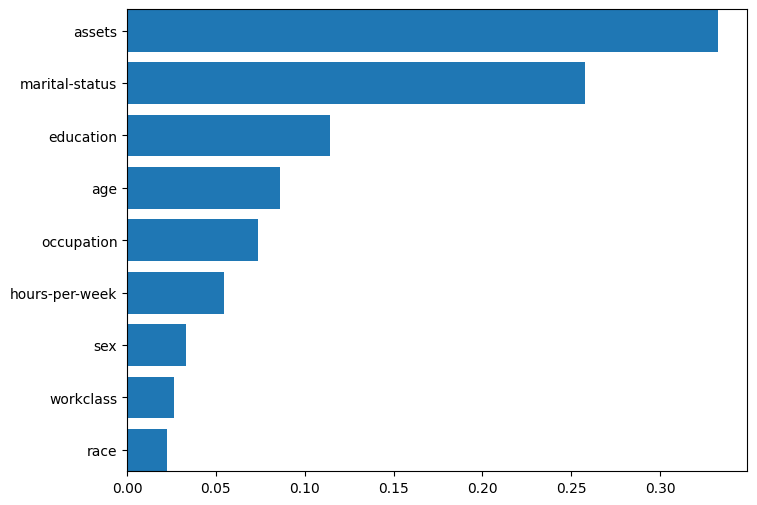

In [87]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

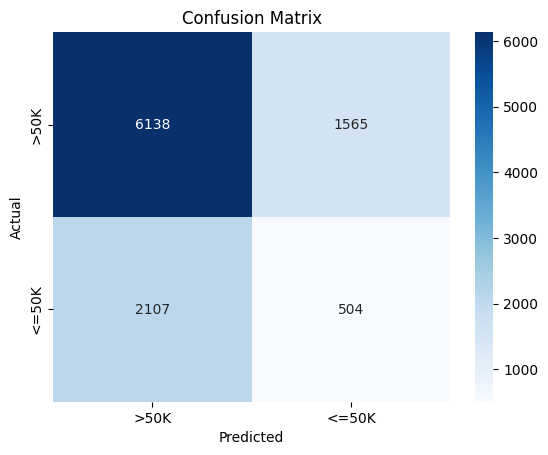

In [88]:
# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


----

### Fine tune the LogisticRegression model

In [89]:
pipeline_lr = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1000]
}

# Set up GridSearchCV to fine-tune the logistic regression model for the best F1 score
grid_search = GridSearchCV(pipeline_lr, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='f1')

In [90]:
# Print out the best parameters and best F1 score from cross-validation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Best Cross-Validation F1 Score: 0.6209902501558244


In [91]:
# Evaluate the tuned model on the test set
y_pred = grid_search.predict(X_test)
test_f1 = f1_score(y_test, y_pred)
print("Test Set F1 Score:", test_f1)

Test Set F1 Score: 0.6221844453888653


We're getting a lower F1 score so this more hyper parameter tuning is needed.

----

### Rerun the census_combined_df through the GradientBoostingClassifier()

In [92]:
# Create the model and fit the data into GradientBoostingClassifier()
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6450045551169147


----

### Apply the model XGBClassifier()

In [93]:
# Create and fit the model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict the test set
y_pred = model.predict(X_test)

# Calculate the F1 score
# Assuming the positive class is '>50K' (as in the common census income dataset)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)



F1 Score: 0.6857871255576801


In [94]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8566026759744038


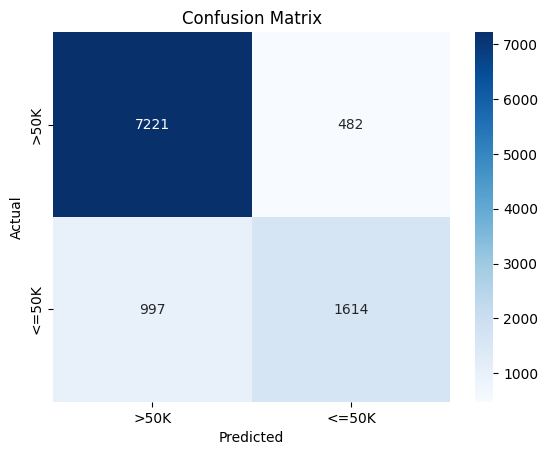

In [95]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Our F1 score improved so we can try fine tuning from here.

## Step 12 - Correlation Matrix Analysis

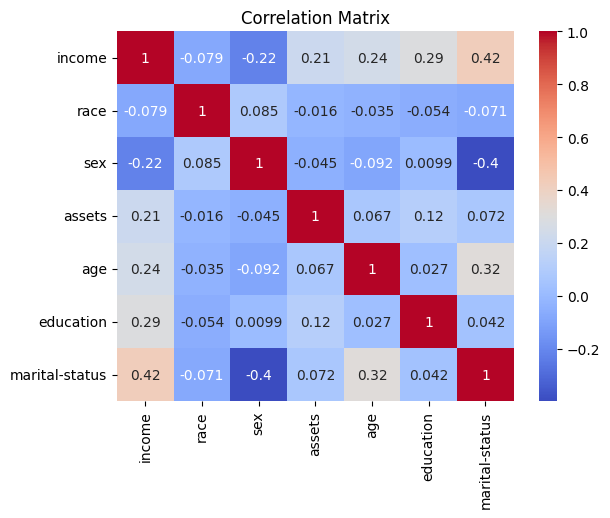

In [96]:
## Create a corrlation heatmap
corr = census_combined_df[['income', 'race', 'sex', 'assets', 'age', 'education', 'marital-status']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## What is the granular correlation between 'Race' and 'Income?'

In [97]:
# Create a contingency table of race vs. income
# 0 = white
# 1 = black
# 2 = Asian-Pac-Islander
# 3 = Amer-Indian-Eskimo
# 4 = Other
race_income_table = pd.crosstab(census_combined_unprocessed_df['race'], census_combined_unprocessed_df['income'])
print(race_income_table)

income              <=50K  >50K
race                           
Amer-Indian-Eskimo    365    52
Asian-Pac-Islander    290   107
Black                3456   504
Other                 146    22
White               26555  9757


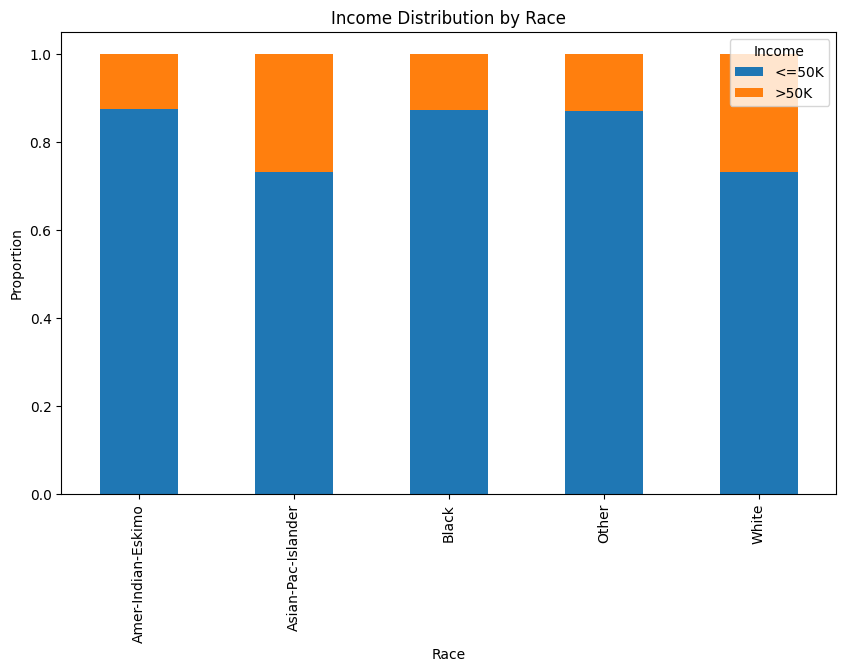

In [98]:
# Visualize the data proportions of race vs income
# Calculate proportions for each race
race_income_prop = race_income_table.div(race_income_table.sum(axis=1), axis=0)

# Plot a stacked bar chart
race_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Race')
plt.ylabel('Proportion')
plt.xlabel('Race')
plt.legend(title='Income')
plt.show()

In [99]:
# For this example, let's just focus on the 'race' feature and income
X = census_combined_df[['race']]
y = census_combined_df['income']

display(print(X.head))

# One-hot encode the race feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding race category names
race_feature_names = encoder.get_feature_names_out(['race'])
coef_df = pd.DataFrame({
    'Race Feature': race_feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df)


<bound method NDFrame.head of        race
0         0
1         0
2         1
4         0
6         0
...     ...
16274     0
16275     0
16277     0
16278     2
16279     0

[41254 rows x 1 columns]>


None

  Race Feature  Coefficient
0       race_0     0.301712
1       race_1    -0.657086
2       race_2     0.332268
3       race_3    -0.633231
4       race_4    -0.641900


### Breakdown of Race Features
    'White': 0,
    'Black': 1,
    'Asian-Pac-Islander': 2,
    'Amer-Indian-Eskimo': 3,
    'Other': 4

Positive coefficients indicate that the race category increases the log odds of earning >50K (assuming >50K is coded as the positive class), while negative coefficients indicate the opposite.


## What is the granular correlation correlation between 'Education' and 'Income?'

In [100]:
# Create a table for 'education' vs 'income'
# 0 = Preschool - 6th grade
# 1 = 7th - High School grad
# 2 = Some college, Associates - Bachelors
# 3 = Masters - Doctorate, Professional school
education_income_table = pd.crosstab(census_combined_df['education'], census_combined_df['income'])
print(education_income_table)

income         0     1
education             
0            196     9
1          15521  2568
2          13803  5703
3           1292  2162


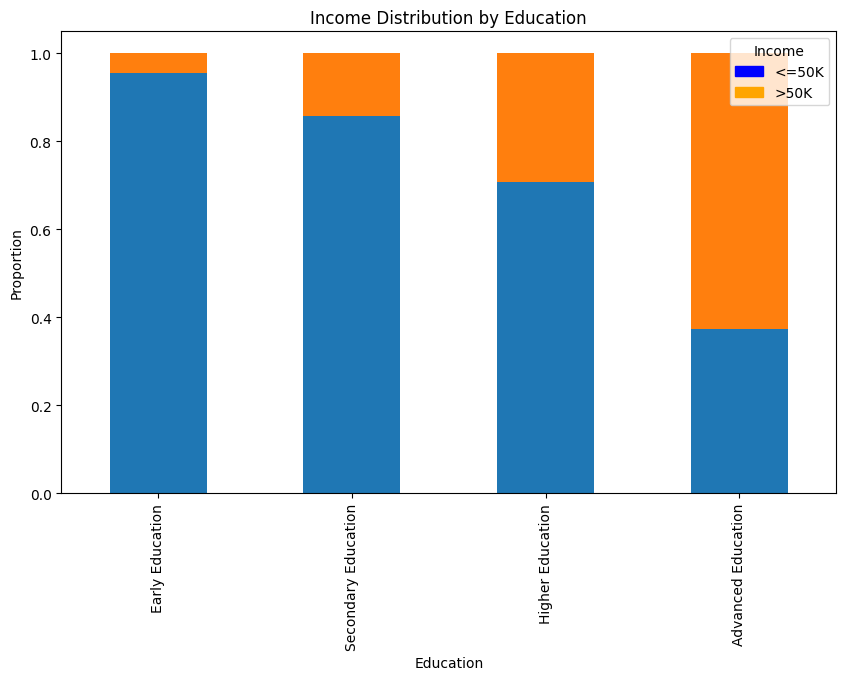

In [101]:
# Visualize the data proportions of education vs income
# Calculate proportions for 'education'
education_income_prop = education_income_table.div(education_income_table.sum(axis=1), axis=0)

# Create a variable for custom legend handles
legend_handles = [
    mpatches.Patch(color='blue', label='<=50K'),
    mpatches.Patch(color='orange', label='>50K')
]
# Plot a stacked bar chart
education_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Education')
plt.ylabel('Proportion')
plt.xlabel('Education')
plt.xticks([0, 1, 2, 3,], ['Early Education', 'Secondary Education', 'Higher Education', 'Advanced Education'], rotation=90)
plt.legend(title='Income', handles=legend_handles)
plt.show()

In [102]:
# Feature is 'education' and target is 'income'
X = census_combined_df[['education']]
y = census_combined_df['income']
display(print(X.head()))

# One-hot encode the education feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding education category names
education_feature_names = encoder.get_feature_names_out(['education'])
coef_df = pd.DataFrame({
    'Education Feature': education_feature_names,
    'Coefficient': model.coef_[0]
})

print(coef_df)

   education
0          2
1          1
2          1
4          3
6          1


None

  Education Feature  Coefficient
0       education_0    -1.882099
1       education_1    -0.786275
2       education_2     0.132819
3       education_3     1.526081


    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 0,
    '7th-8th': 1,
    '9th': 1,
    '10th': 1,
    '11th': 1,
    '12th': 1,
    'HS-grad': 1,
    'Some-college': 2,
    'Assoc-acdm': 2,
    'Assoc-voc': 2,
    'Bachelors': 2,
    'Masters': 3,
    'Doctorate': 3,
    'Prof-school': 3

Reading the value of the coefficients, a person is more likely to earn less than 50K if they only completed an education level up to 12th grade, so without a high school GED. A Person who has completed high school and their bachelor's in college is partially likely to earn more than 50k and for someone who has completed a masters or doctorate program is very likely to earn more than 50k.

## What is the granular correlation correlation between 'Age' and 'Income?'

In [103]:
# Create a table for 'age' vs 'income'
# 0 = less than 30 years
# 1 = between 30 and 50 years   
# 2 = above 50 years
age_income_table = pd.crosstab(census_combined_df['age'], census_combined_df['income'])
print(age_income_table)

income      0     1
age                
0       12054   884
1       13452  6873
2        5306  2685


In [104]:
# Visualize the data proportions of age vs income
# Calculate proportions for 'age'
age_income_prop = age_income_table.div(age_income_table.sum(axis=1), axis=0)

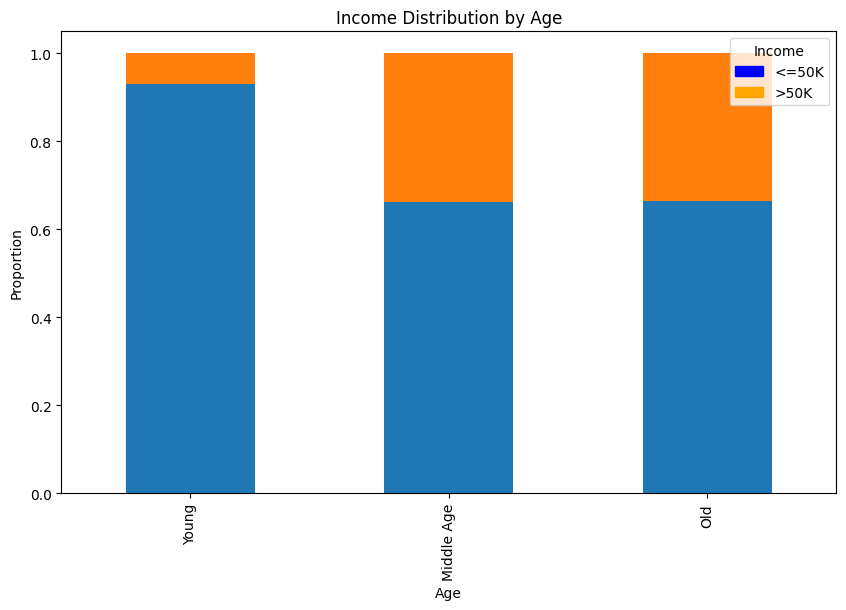

In [105]:
# Create a variable for custom legend handles
legend_handles = [
    mpatches.Patch(color='blue', label='<=50K'),
    mpatches.Patch(color='orange', label='>50K')
]
# Plot a stacked bar chart
age_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Age')
plt.ylabel('Proportion')
plt.xlabel('Age')
plt.xticks([0, 1, 2], ['Young', 'Middle Age', 'Old'], rotation=90)
plt.legend(title='Income', handles=legend_handles)
plt.show()

In [106]:
# Feature is 'age' and target is 'income'
X = census_combined_df[['age']]
y = census_combined_df['income']
display(print(X.head()))

# One-hot encode the education feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding age category names
age_feature_names = encoder.get_feature_names_out(['age'])
coef_df = pd.DataFrame({
    'Age Feature': age_feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df)

   age
0    1
1    1
2    2
4    1
6    2


None

  Age Feature  Coefficient
0       age_0    -1.611881
1       age_1     0.322634
2       age_2     0.301667


Reading the coefficients, Middle and Older aged people are likely to make more than 50k.

## What is the granular correlation correlation between 'Marital Status' and 'Income?'

In [107]:
# Create a table for 'marital-status' vs 'income'
marital_status_income_table = pd.crosstab(census_combined_df['marital-status'], census_combined_df['income'])
print(marital_status_income_table)

income              0     1
marital-status             
0               19074  1385
1               11738  9057


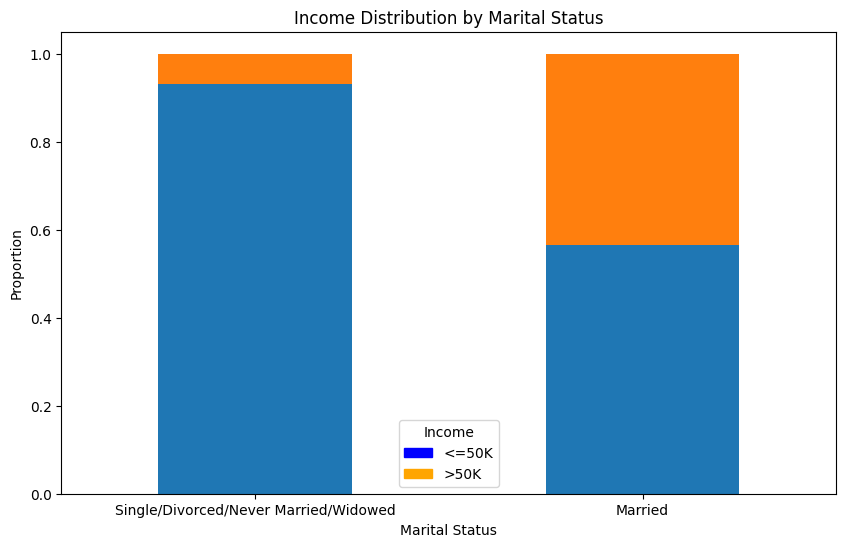

In [108]:
# Visualize the data proportions of marital-status vs income
# Calculate proportions for 'marital-status'
marital_status_income_prop = marital_status_income_table.div(marital_status_income_table.sum(axis=1), axis=0)

# Create a variable for custom legend handles
legend_handles = [
    mpatches.Patch(color='blue', label='<=50K'),
    mpatches.Patch(color='orange', label='>50K')
]
# Plot a stacked bar chart
marital_status_income_prop.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Income Distribution by Marital Status')
plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.xticks([0, 1], ['Single/Divorced/Never Married/Widowed', 'Married'], rotation=360)
plt.legend(title='Income', handles=legend_handles)
plt.show()

In [ ]:
# Feature is 'marital status' and target is 'income'
# 0 = not married types
# 1 = married types
X = census_combined_df[['marital-status']]
y = census_combined_df['income']
display(print(X.head()))

# One-hot encode the marital-status feature
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Print the coefficients with their corresponding age category names
marital_status_feature_names = encoder.get_feature_names_out(['marital-status'])
coef_df = pd.DataFrame({
    'Marital Status Feature': marital_status_feature_names,
    'Coefficient': model.coef_[0]
})
print(coef_df)

   marital-status
0               1
1               0
2               1
4               1
6               1


None

  Marital Status Feature  Coefficient
0       marital-status_0    -1.655997
1       marital-status_1     0.700086


Reading the coefficients, Married people are likely to make more than 50k due to combined income.